In [21]:
#手の表面を1フレームずつ画像に変換処理--(pro1)
import cv2
import os

save_dir="./backkotei/mine/ura"
cap=cv2.VideoCapture("./backkotei/MOV/mineura.MOV")
if not cap.isOpened():
    sys.exit()
n= 0
while True:
    # read()でフレーム画像が読み込めたかを示すbool、フレーム画像の配列ndarrayのタプル
    is_image,frame_img = cap.read()
    if is_image:
        # 画像を保存
        outfile=save_dir+"/"+str(n)+".jpg"
        cv2.imwrite(outfile, frame_img)
    else:
        # フレーム画像が読込なかったら終了
        break
    n += 1

cap.release()
print("ok")

ok


In [6]:
#手の裏面を1フレームずつ画像に変換処理--(pro1)
import cv2
import os

save_dir="./mixpic/zemi"
cap=cv2.VideoCapture("./MOV/naka1.MOV")
if not cap.isOpened():
    sys.exit()
no=1305
n= 0
while True:
    # read()でフレーム画像が読み込めたかを示すbool、フレーム画像の配列ndarrayのタプル
    is_image,frame_img = cap.read()
    if is_image:
        # 画像を保存
        outfile=save_dir+"/"+str(no)+".jpg"
        cv2.imwrite(outfile, frame_img)
    else:
        # フレーム画像が読込なかったら終了
        break
    n += 1
    no += 1

cap.release()
print("ok")

ok


In [22]:
#画像ファイルを読み込んでNumpy形式に変換--(pro2)
import numpy as np
from PIL import Image
import os,glob,random

outfile="backkotei/omoteura.npz"#保存ファイル名
max_photo=16000#利用する写真の枚数
photo_size=64#64ピクセルに変換
x=[]#画像データ
y=[]#ラベルデータ

def main():
    #各画像のフォルダーを読み込む
    #glob_files("./mixzemiandmine/mine",0)
    #glob_files("./mixzemiandmine/zemi",1)
    glob_files("./backkotei/mine/omote",0)
    glob_files("./backkotei/mine/ura",1)
    #glob_files("./pakupaku/motherhands/handomote",2)
    #glob_files("./pakupaku/motherhands/handura",3)
    #glob_files("./pakupaku/rokkahands/handomote",4)
    #glob_files("./pakupaku/rokkahands/handura",5)
    #glob_files("./pakupaku/tochihands/tochiomote",2)
    #glob_files("./pakupaku/tochihands/tochiura",3)
    glob_files("./backkotei/okutani/omote",2)
    glob_files("./backkotei/okutani/ura",3)
    glob_files("./backkotei/mimura/omote",4)
    glob_files("./backkotei/mimura/ura",5)
    glob_files("./backkotei/nakamura/omote",6)
    glob_files("./backkotei/nakamura/ura",7)
    glob_files("./backkotei/gotou/omote",8)
    glob_files("./backkotei/gotou/ura",9)
    #glob_files("./backkotei/torihands/toriomote",12)
    #glob_files("./backkotei/torihands/toriura",13)
    #glob_files("./pakupaku/openhands/hands",10)
    #ファイルへ保存
    np.savez(outfile,x=x,y=y)
    print("保存しました:"+outfile,len(x))
    
#path以下の画像を読み込む
def glob_files(path,label):
    files=glob.glob(path+"/*.jpg")
    random.shuffle(files)
    #各ファイルを処理
    num=0
    for f in files:
        if num>=max_photo: break
        num+=1
        #画像ファイルを読み込む
        img=Image.open(f)
        img=img.convert("RGB")#色空間をRGBに
        img=img.resize((photo_size,photo_size))#サイズ変更
        img=np.asarray(img)
        x.append(img)
        y.append(label)
if __name__=='__main__':
    main()

保存しました:backkotei/omoteura.npz 2070


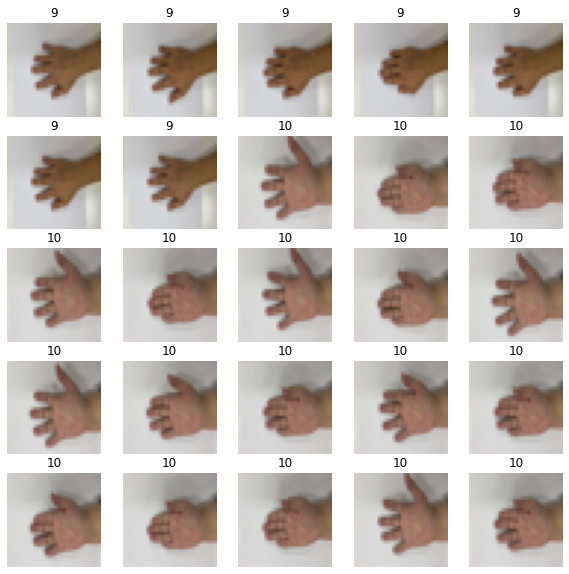

In [10]:
#pro2のnumpyファイルが正しく保存されているかの確認プログラム
import matplotlib.pyplot as plt
#写真データ読み込み
photos=np.load('pakupaku/zemiandminehyouri.npz')
x=photos['x']
y=photos['y']
#開始インデックス
idx=1900
#pyplotで出力
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis("off")
    plt.title(y[i+idx])
    plt.imshow(x[i+idx])
plt.show()

Epoch 1/20
48/48 [==============================] - 4s 74ms/step - loss: 0.4700 - accuracy: 0.8111 - val_loss: 0.2070 - val_accuracy: 0.9031
Epoch 2/20
48/48 [==============================] - 3s 70ms/step - loss: 0.1751 - accuracy: 0.9357 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 3/20
48/48 [==============================] - 4s 78ms/step - loss: 0.0496 - accuracy: 0.9856 - val_loss: 0.0467 - val_accuracy: 0.9738
Epoch 4/20
48/48 [==============================] - 3s 73ms/step - loss: 0.0434 - accuracy: 0.9869 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 5/20
48/48 [==============================] - 4s 79ms/step - loss: 0.0354 - accuracy: 0.9902 - val_loss: 3.2521e-04 - val_accuracy: 1.0000
Epoch 6/20
48/48 [==============================] - 3s 69ms/step - loss: 6.6635e-04 - accuracy: 1.0000 - val_loss: 1.5325e-05 - val_accuracy: 1.0000
Epoch 7/20
48/48 [==============================] - 3s 69ms/step - loss: 2.9657e-05 - accuracy: 1.0000 - val_loss: 2.1845e-07 - val_accuracy: 

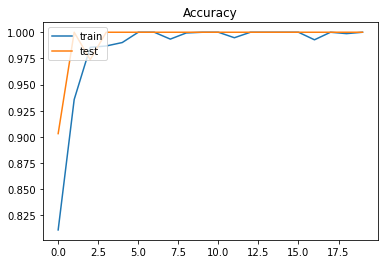

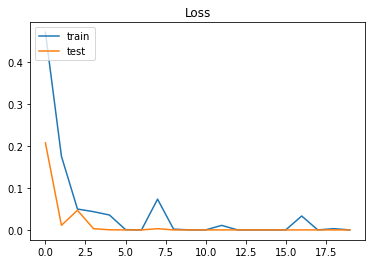

In [17]:
#CNNモデルの構築とCNNモデルを用いた機械学習--(pro3)
import keras 
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# CNNのモデルを定義する
def def_model(in_shape, nb_classes):
    model = Sequential()
    model.add(Conv2D(32,
              kernel_size=(3, 3),
              activation='relu',
              input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    return model

# コンパイル済みのCNNのモデルを返す
def get_model(in_shape, nb_classes):
    model = def_model(in_shape, nb_classes)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=RMSprop(),
        metrics=['accuracy'])
    return model


# 入力と出力を指定 --- (*1)
im_rows = 32 # 画像の縦ピクセルサイズ
im_cols = 32 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 2 #ラベルの数【出力】

# 写真データを読み込み --- (*2)
photos = np.load('mixzemiandmine/zemiandmine.npz')
x = photos['x']
y = photos['y']

# 読み込んだデータをの三次元配列に変換 --- (*3)
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す --- (*4)
y = keras.utils.to_categorical(y.astype('int32'), nb_classes)

# 学習用とテスト用に分ける --- (*5)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

# CNNモデルを取得 --- (*6)
model = get_model(in_shape, nb_classes)

# 学習を実行 --- (*7)
hist = model.fit(x_train, y_train,
          batch_size=32,#一回に学習するデータ数
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

# モデルを評価 --- (*8)
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*9)
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./pakupaku/allhyouri.hdf5')

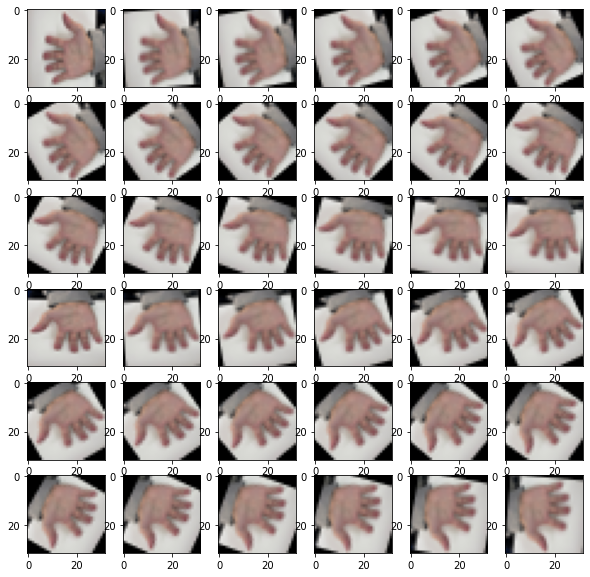

In [19]:
#データを水増しして表示するプログラム--(pro4)
import matplotlib.pyplot as plt
import cv2

#写真データの読み込み
photos=np.load('hands/photos.npz')
x=photos['x']
img=x[12]#わかりやすい写真を選択

plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    #回転を実行
    center = (16,16)#回転の中心点
    angle=i*5#角度を変えて出力
    scale=1.0#拡大率
    mtx=cv2.getRotationMatrix2D(center,angle,scale)
    img2=cv2.warpAffine(img,mtx,(32,32))
    #回転した画像を表示
    plt.imshow(img2)
plt.show()

水増し前＝ 2047
水増し後= 49128
Epoch 1/10
1536/1536 [==============================] - 459s 299ms/step - loss: 0.3648 - accuracy: 0.8819 - val_loss: 9.2545e-05 - val_accuracy: 1.0000
Epoch 2/10
1536/1536 [==============================] - 449s 293ms/step - loss: 0.0348 - accuracy: 0.9927 - val_loss: 3.8713e-04 - val_accuracy: 1.0000
Epoch 3/10
1536/1536 [==============================] - 479s 312ms/step - loss: 0.0218 - accuracy: 0.9955 - val_loss: 4.9964e-07 - val_accuracy: 1.0000
Epoch 4/10
1536/1536 [==============================] - 430s 280ms/step - loss: 0.0165 - accuracy: 0.9972 - val_loss: 3.9581e-09 - val_accuracy: 1.0000
Epoch 5/10
1536/1536 [==============================] - 433s 282ms/step - loss: 0.0156 - accuracy: 0.9975 - val_loss: 5.0291e-08 - val_accuracy: 1.0000
Epoch 6/10
1536/1536 [==============================] - 434s 283ms/step - loss: 0.0146 - accuracy: 0.9979 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
1536/1536 [==============================] - 463s 301m

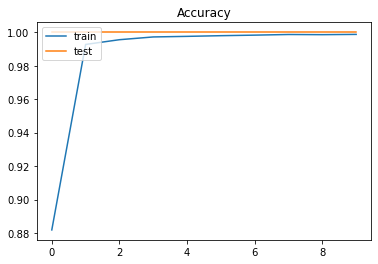

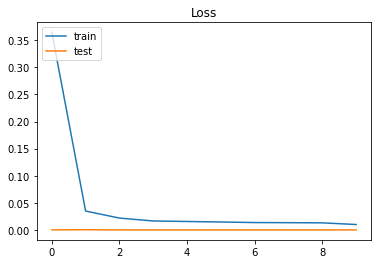

In [5]:
#データを水増しして学習するプログラム
import keras 
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import cv2

# CNNのモデルを定義する
def def_model(in_shape, nb_classes):
    model = Sequential()
    model.add(Conv2D(32,
              kernel_size=(3, 3),
              activation='relu',
              input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    return model

# コンパイル済みのCNNのモデルを返す
def get_model(in_shape, nb_classes):
    model = def_model(in_shape, nb_classes)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=RMSprop(),
        metrics=['accuracy'])
    return model


# 入力と出力を指定 --- (*1)
im_rows = 64 # 画像の縦ピクセルサイズ
im_cols = 64 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 14#出力

# 写真データを読み込み --- (*2)
photos = np.load('pakupaku/zemiandminehyouri.npz')
x = photos['x']
y = photos['y']

# 読み込んだデータをの三次元配列に変換 --- (*3)
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す --- (*4)
y = keras.utils.to_categorical(y.astype('int32'), nb_classes)

# 学習用とテスト用に分ける --- (*5)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

#学習用データを水増しする
x_new=[]
y_new=[]
for i ,xi in enumerate(x_train):
    yi=y_train[i]
    for ang in range(-30,30,5):
        #回転させる
        center=(16,16)#回転の中心点
        mtx=cv2.getRotationMatrix2D(center,ang,1.0)
        xi2=cv2.warpAffine(xi,mtx,(64,64))
        x_new.append(xi2)
        y_new.append(yi)
        #さらに左右反転させる
        xi3=cv2.flip(xi2,1)
        x_new.append(xi3)
        y_new.append(yi)
        
#水増しした画像を学習用に置き換える
print("水増し前＝",len(y_train))
x_train=np.array(x_new)
y_train=np.array(y_new)
print('水増し後=',len(y_train))

# CNNモデルを取得 --- (*6)
model = get_model(in_shape, nb_classes)

# 学習を実行 --- (*7)
hist = model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

# モデルを評価 --- (*8)
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*9)
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./hands/photos-model-inc.hdf5')

In [51]:
#水増しした画像をフォルダに保存するプログラム【自分の手用】--(pro5)
import cv2,glob,os

def main():
    img_files = glob.glob('./hands/myhand/*.jpg')
    for i in img_files:
        img = cv2.imread(i)
        height, width, channels = img.shape
        center = (int(width/2), int(height/2))
        for ang in range(-30,30,5):
            #回転させる
            center=(16,16)#回転の中心点
            mtx=cv2.getRotationMatrix2D(center,ang,1.0)
            img2=cv2.warpAffine(img,mtx,(height,width))
            cv2.imwrite(str(i)+"_"+str(ang)+".jpg",img2)


if __name__ == "__main__":
    main()

In [29]:
#サーキットラーンでnpzを機械学習するプログラム--(pro6)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import cv2

# 写真データを読み込み
photos = np.load('pakupaku/zemiandminehyouri.npz')
x = photos['x']
y = photos['y']


# 学習用とテスト用に分ける 
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, train_size=0.8,shuffle=True)

clf=SVC()

clf.fit=(x_train,y_train)

y_pred=clf.predict(x_test)
print('正解率=', accuracy_score(y_test,y_pred))


NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Epoch 1/20
16/16 [==============================] - 1s 44ms/step - loss: 4.8361 - accuracy: 0.0879 - val_loss: 2.4907 - val_accuracy: 0.1074
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 2.5102 - accuracy: 0.1348 - val_loss: 2.3929 - val_accuracy: 0.1270
Epoch 3/20
16/16 [==============================] - 1s 43ms/step - loss: 2.3266 - accuracy: 0.2101 - val_loss: 1.9892 - val_accuracy: 0.2930
Epoch 4/20
16/16 [==============================] - 1s 35ms/step - loss: 2.1026 - accuracy: 0.2755 - val_loss: 1.7269 - val_accuracy: 0.4043
Epoch 5/20
16/16 [==============================] - 0s 28ms/step - loss: 1.8492 - accuracy: 0.3429 - val_loss: 1.7794 - val_accuracy: 0.3906
Epoch 6/20
16/16 [==============================] - 0s 27ms/step - loss: 1.7391 - accuracy: 0.3771 - val_loss: 1.3712 - val_accuracy: 0.5762
Epoch 7/20
16/16 [==============================] - 0s 27ms/step - loss: 1.4485 - accuracy: 0.4846 - val_loss: 1.5267 - val_accuracy: 0.3965
Epoch 8/20
16

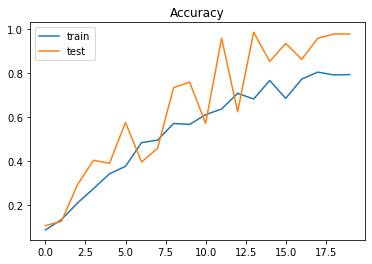

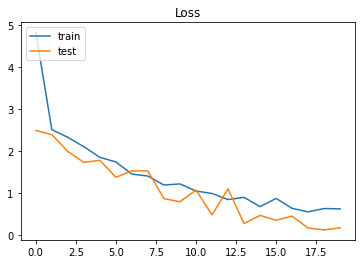

In [2]:
#MLPを用いた機械学習--(pro7)
import keras 
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# 入力と出力を指定 --- (*1)
in_shape=32*32*3
nb_classes = 14#出力

# 写真データを読み込み --- (*2)
photos = np.load('pakupaku/zemiandminehyouri.npz')
x = photos['x']
y = photos['y']

# 学習用とテスト用に分ける --- (*5)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

x_train=x_train.reshape(-1,in_shape).astype('float32')/255
x_test=x_test.reshape(-1,in_shape).astype('float32')/255

y_train=keras.utils.to_categorical(y_train.astype('int32'),14)
y_test=keras.utils.to_categorical(y_test.astype('int32'),14)

model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(in_shape,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes,activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 学習を実行 --- (*7)
hist = model.fit(x_train, y_train,
          batch_size=128,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

# モデルを評価 --- (*8)
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*9)
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./pakupaku/photos-model-mlp.hdf5')

Epoch 1/20
64/64 [==============================] - 6s 87ms/step - loss: 2.0113 - accuracy: 0.3166 - val_loss: 1.4066 - val_accuracy: 0.5410
Epoch 2/20
64/64 [==============================] - 4s 67ms/step - loss: 0.4389 - accuracy: 0.8486 - val_loss: 0.0932 - val_accuracy: 0.9688
Epoch 3/20
64/64 [==============================] - 4s 69ms/step - loss: 0.1440 - accuracy: 0.9570 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 4/20
64/64 [==============================] - 4s 68ms/step - loss: 0.0887 - accuracy: 0.9697 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 5/20
64/64 [==============================] - 4s 66ms/step - loss: 0.0569 - accuracy: 0.9849 - val_loss: 3.1270e-04 - val_accuracy: 1.0000
Epoch 6/20
64/64 [==============================] - 4s 67ms/step - loss: 0.0361 - accuracy: 0.9932 - val_loss: 0.0120 - val_accuracy: 0.9922
Epoch 7/20
64/64 [==============================] - 4s 67ms/step - loss: 0.0512 - accuracy: 0.9902 - val_loss: 1.9779e-04 - val_accuracy: 1.0000
Epoch

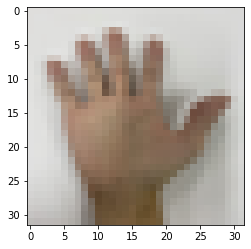

この写真は、 鳥海君の表 の手です。
可能性は、 99 %です。


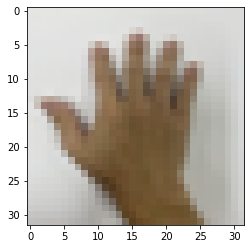

この写真は、 鳥海君の表 の手です。
可能性は、 99 %です。


In [4]:
#load-wightを用いないCNNによる学習--(pro8)
import keras 
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# CNNのモデルを定義する
def def_model(in_shape, nb_classes):
    model = Sequential()
    model.add(Conv2D(32,
              kernel_size=(3, 3),
              activation='relu',
              input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    return model

# コンパイル済みのCNNのモデルを返す
def get_model(in_shape, nb_classes):
    model = def_model(in_shape, nb_classes)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=RMSprop(),
        metrics=['accuracy'])
    return model

target_omote="test-mineomote.jpg"
target_ura="test-mineura.jpg"
# 入力と出力を指定 --- (*1)
im_rows = 32 # 画像の縦ピクセルサイズ
im_cols = 32 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 14 #ラベルの数【出力】

LABELS=["江波戸の表","江波戸の裏","栃窪先生の表","栃窪先生の裏"
       ,"奥谷君の表","奥谷君の裏","三村君の表","三村君の裏","中村君の表"
       ,"中村君の裏","後藤さんの表","後藤さんの裏","鳥海君の表","鳥海君の裏"]

# 写真データを読み込み --- (*2)
photos = np.load('pakupaku/zemiandminehyouri.npz')
x = photos['x']
y = photos['y']

# 読み込んだデータをの三次元配列に変換 --- (*3)
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す --- (*4)
y = keras.utils.to_categorical(y.astype('int32'), nb_classes)

# 学習用とテスト用に分ける --- (*5)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

# CNNモデルを取得 --- (*6)
model = get_model(in_shape, nb_classes)

hist = model.fit(x_train, y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

def check_photo(path):
    img=Image.open(path)
    img=img.convert("RGB")#RGBに
    img=img.resize((im_cols,im_rows))#サイズ変更
    plt.imshow(img)
    plt.show()
    #データに変換
    x=np.asarray(img)
    x=x.reshape(-1,im_rows,im_cols,im_color)
    x=x/255
    
    #予測
    pre=model.predict([x])[0]
    idx=pre.argmax()
    per=int(pre[idx]*100)
    return(idx,per)

def check_photo_str(path):
    idx,per=check_photo(path)
    #答えを表示
    print("この写真は、",LABELS[idx],"の手です。")
    print("可能性は、",per,"%です。")
    
if __name__=='__main__':
    check_photo_str(target_omote)
    check_photo_str(target_ura)

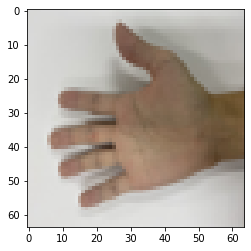

この写真は、 江波戸の表 です。
可能性は、 99 %です。


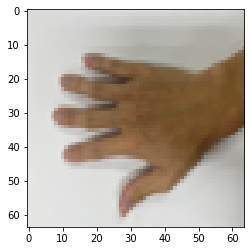

この写真は、 栃窪先生の裏 です。
可能性は、 78 %です。


In [8]:
#CNNモデルを用いた機械学習--(pro8)
import keras 
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# CNNのモデルを定義する
def def_model(in_shape, nb_classes):
    model = Sequential()
    model.add(Conv2D(32,
              kernel_size=(3, 3),
              activation='relu',
              input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    return model

# コンパイル済みのCNNのモデルを返す
def get_model(in_shape, nb_classes):
    model = def_model(in_shape, nb_classes)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=RMSprop(),
        metrics=['accuracy'])
    return model

target_omote="test-mineomote.jpg"
target_ura="test-mineura.jpg"
# 入力と出力を指定 --- (*1)
im_rows = 64 # 画像の縦ピクセルサイズ
im_cols = 64 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 14 #ラベルの数【出力】

LABELS=["江波戸の表","江波戸の裏","栃窪先生の表","栃窪先生の裏"
      ,"奥谷君の表","奥谷君の裏","三村君の表","三村君の裏","中村君の表"
     ,"中村君の裏","後藤さんの表","後藤さんの裏","鳥海君の表","鳥海君の裏"]
#LABELS=["江波戸の手","江波戸以外の手"]

# 写真データを読み込み --- (*2)

model = get_model(in_shape, nb_classes)
model.load_weights('./pakupaku/photos-model.hdf5')

def check_photo(path):
    img=Image.open(path)
    img=img.convert("RGB")#RGBに
    img=img.resize((im_cols,im_rows))#サイズ変更
    plt.imshow(img)
    plt.show()
    #データに変換
    x=np.asarray(img)
    x=x.reshape(-1,im_rows,im_cols,im_color)
    x=x/255
    
    #予測
    pre=model.predict([x])[0]
    idx=pre.argmax()
    per=int(pre[idx]*100)
    return(idx,per)

def check_photo_str(path):
    idx,per=check_photo(path)
    #答えを表示
    #print("この写真は、",LABELS[idx],"の手です。")
    print("この写真は、",LABELS[idx],"です。")
    print("可能性は、",per,"%です。")
    
if __name__=='__main__':
    check_photo_str(target_omote)
    check_photo_str(target_ura)

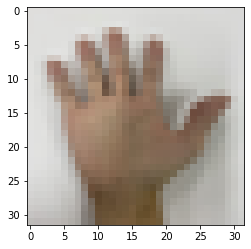

この写真は、 鳥海君の表 の手です。
可能性は、 97 %です。


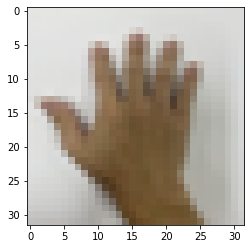

この写真は、 鳥海君の表 の手です。
可能性は、 94 %です。


In [1]:
#MLPモデルを用いた機械学習--(pro8)
import keras 
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# CNNのモデルを定義する
def def_model(in_shape, nb_classes):
    model=Sequential()
    model.add(Dense(512,activation='relu',input_shape=(in_shape,)))
    model.add(Dropout(0.2))
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(nb_classes,activation='softmax'))
    return model

# コンパイル済みのCNNのモデルを返す
def get_model(in_shape, nb_classes):
    model = def_model(in_shape, nb_classes)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=RMSprop(),
        metrics=['accuracy'])
    return model

target_omote="test-mineomote.jpg"
target_ura="test-mineura.jpg"
in_shape=32*32*3
nb_classes = 14#出力

LABELS=["江波戸の表","江波戸の裏","栃窪先生の表","栃窪先生の裏"
       ,"奥谷君の表","奥谷君の裏","三村君の表","三村君の裏","中村君の表"
       ,"中村君の裏","後藤さんの表","後藤さんの裏","鳥海君の表","鳥海君の裏"]

# 写真データを読み込み --- (*2)

model = get_model(in_shape, nb_classes)
model.load_weights('./pakupaku/photos-model-mlp.hdf5')

def check_photo(path):
    img=Image.open(path)
    img=img.convert("RGB")#RGBに
    img=img.resize((32,32))#サイズ変更
    plt.imshow(img)
    plt.show()
    #データに変換
    x=np.asarray(img)
    x=x.reshape(-1,in_shape)
    x=x/255
    
    #予測
    pre=model.predict([x])[0]
    idx=pre.argmax()
    per=int(pre[idx]*100)
    return(idx,per)

def check_photo_str(path):
    idx,per=check_photo(path)
    #答えを表示
    print("この写真は、",LABELS[idx],"の手です。")
    print("可能性は、",per,"%です。")
    
if __name__=='__main__':
    check_photo_str(target_omote)
    check_photo_str(target_ura)